In [5]:
library(tidyverse)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### 1. Load the dataset in titanic.csv as titanic.

In [1]:
titanic <- read.csv("E:/Data Analysis/SAIT/DATA 420 - Predictive Analytics/titanic.csv")

In [11]:
titanic <- na.omit(titanic)

In [13]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,0,3,male,22,1,0,7.2500,S,Third,man,TRUE,,Southampton,no,FALSE
2,1,1,female,38,1,0,71.2833,C,First,woman,FALSE,C,Cherbourg,yes,FALSE
3,1,3,female,26,0,0,7.9250,S,Third,woman,FALSE,,Southampton,yes,TRUE
4,1,1,female,35,1,0,53.1000,S,First,woman,FALSE,C,Southampton,yes,FALSE
5,0,3,male,35,0,0,8.0500,S,Third,man,TRUE,,Southampton,no,TRUE
7,0,1,male,54,0,0,51.8625,S,First,man,TRUE,E,Southampton,no,TRUE
8,0,3,male,2,3,1,21.0750,S,Third,child,FALSE,,Southampton,no,FALSE
9,1,3,female,27,0,2,11.1333,S,Third,woman,FALSE,,Southampton,yes,FALSE
10,1,2,female,14,1,0,30.0708,C,Second,child,FALSE,,Cherbourg,yes,FALSE
11,1,3,female,4,1,1,16.7000,S,Third,child,FALSE,G,Southampton,yes,FALSE


### Create a new data frame, firstSouth, by subsetting titanic to include instances where a passenger is in the first class cabin (pclass feature is 1) and boarded from Southampton (embarked feature is S).

In [188]:
FirstSouth <- subset(titanic, pclass == 1 & embarked == "S")
FirstSouth <- group_by(FirstSouth, pclass)
FirstSouth <- summarize(FirstSouth, female = sum(sex == "female"), male = sum(sex == "male"))
FirstSouth

pclass,female,male
1,44,64


In [258]:
titanic %>%
group_by(pclass == 1 & embarked == "S", sex) %>%
summarize(Count = n()) %>%
spread(sex, Count)


"pclass == 1 & embarked == ""S""",female,male
FALSE,217,389
TRUE,44,64


### Create a new data frame, secondThird, by subsetting titanic to include instances where a passenger is either in the second (pclass feature is 2) or third class (pclass feature is 3) cabin.

In [226]:
SecondThird <- subset(titanic, pclass == 2 | pclass == 3)
SecondThird <- group_by(SecondThird, pclass)
SecondThird <- summarize(SecondThird, Not_Alive = sum(alive=="no"), Alive = sum(alive=="yes"))
SecondThird

pclass,Not_Alive,Alive
2,90,83
3,270,85


In [192]:
titanic %>%
group_by(pclass == 2, pclass == 3, alive) %>%
summarize(Count = n()) %>%
spread(alive, Count)

pclass == 2,pclass == 3,no,yes
FALSE,FALSE,64,122
FALSE,TRUE,270,85
TRUE,FALSE,90,83


### Passengers in first class who embarked in Southampton grouped by sex

In [43]:
Southampton <- filter(titanic, titanic$embark_town == "Southampton")

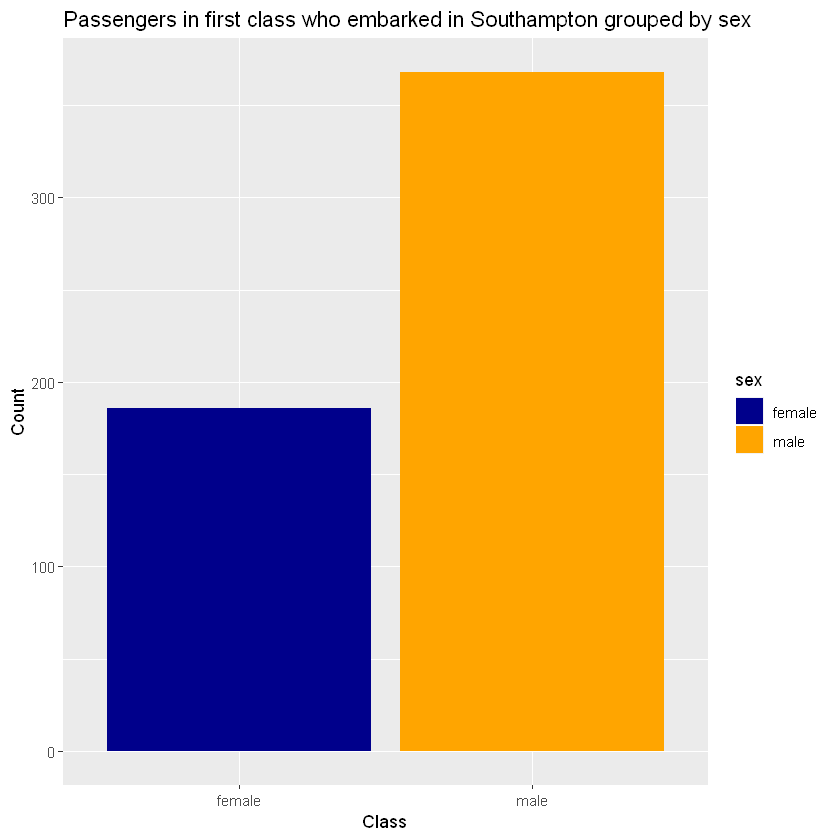

In [107]:
ggplot(Southampton, 
        aes(x = sex, fill = sex))+
        geom_bar()+
        labs(title="Passengers in first class who embarked in Southampton grouped by sex", x="Class", y="Count")+
        scale_fill_manual(values = c("dark blue", "orange"))
       

### Passengers in second and third class grouped by survival status alive

In [59]:
classgroup <- filter(titanic, pclass == 2 | pclass == 3)

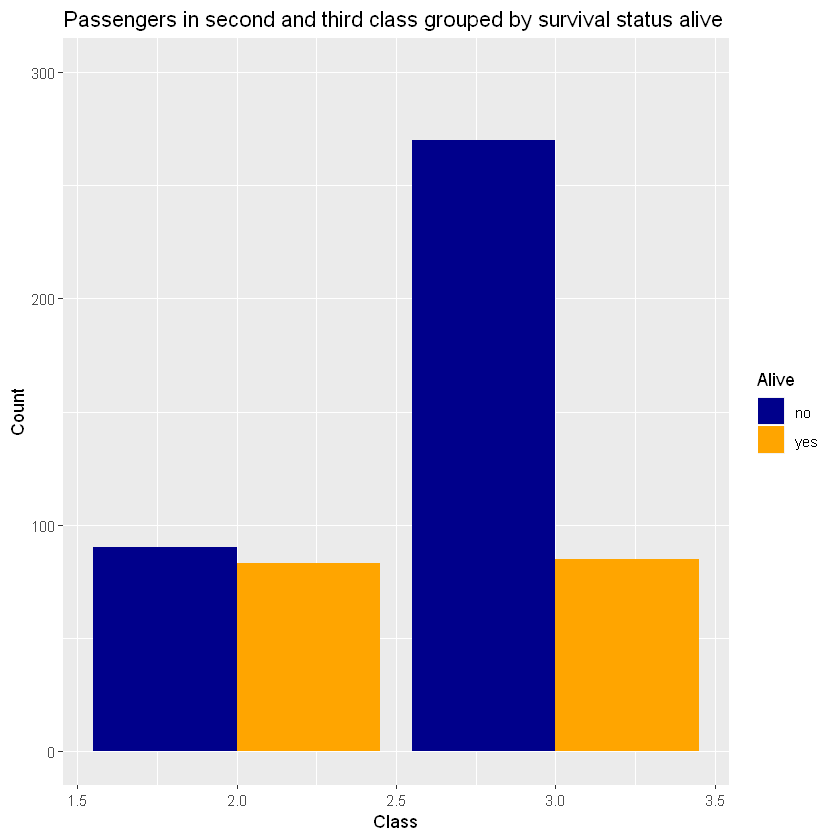

In [127]:
ggplot(classgroup, aes(x = pclass, fill = alive)) +
        geom_bar(position = "dodge")+ 
        scale_fill_manual(values = c("dark blue", "orange"))+
        labs(title = "Passengers in second and third class grouped by survival status alive", x = "Class", y = "Count", fill = "Alive")+
        ylim(0,300)